# Data Preparation

In [1]:
# import necessary libraries to get the data
import requests
import html5lib
from bs4 import BeautifulSoup as bs
from nltk.tokenize import sent_tokenize
import pandas as pd

In [2]:
# in case we need to download NLTK punctuations
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
link = 'https://republika.co.id/berita/qcsbt4383/akhlak-sebagai-emcore-valueem-bumn-erick-thohir-bismillah' #'https://ekonomi-islam.com/tag/teori-teori-ekonomi-islam/'
req = requests.get(link)
soup = bs(req.content, 'html5lib')

In [4]:
paragraphs = soup.findAll('p')

In [8]:
text = []
for p in paragraphs:
  text.append(p.text)

# Data Preprocessing

In [46]:
text_ready = ' '.join(text[5:7])

In [45]:
text_ready

'Menteri BUMN Erick Thohir meluncurkan logo baru Kementerian BUMN di halaman kantor Kementerian BUMN, Jakarta, Rabu (1/7).  REPUBLIKA.CO.ID, JAKARTA -- Menteri Badan Usaha Milik Negara (BUMN) Erick Thohir secara resmi menetapkan akhlak sebagai core value dari BUMN pada Rabu (1/7). Penetapan akhlak sebagai core value BUMN bersamaan dengan acara perubahan logo dan slogan Kementerian BUMN."Hari ini juga saya ingin menetapkan akhlak sebagai core value bukan lip service karena kalau kita bekerja ada core value, ini yang membuat kita kuat," ujar Erick saat meresmikan perubahan logo dan slogan Kementerian BUMN di halaman kantor Kementerian BUMN di Jalan Medan Merdeka Selatan, Jakarta, Rabu (1/7).Erick menjadikan akhlak sebagai panduan bagi manajemen BUMN untuk dapat bekerja dengan benar demi kepentingan bangsa, bukan kepentingan pribadi atau kelompok. Erick memerinci akronim akhlak terdiri atas amanah, kompeten, harmonis, loyal, adaptif, dan kolaboratif.Erick menilai faktor akhlak sangat vita

# Labelling

In [57]:
annotations = sorted(['nama',
               'tanggal',
               'hari',
               'lokasi',
               'organisasi',
               ])
annotations

['hari', 'lokasi', 'nama', 'organisasi', 'tanggal']

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
# copy necessary file to Google Colab
!cp "/content/drive/My Drive/Colab Notebooks/coba/BIOtagging.py" .

In [31]:
# install Sastrawi
!pip install sastrawi

     |████████████████████████████████| 215kB 2.7MB/s 


In [32]:
from BIOtagging import PUUtext_to_tagReadyDF, convert_to_spaCyformat

In [47]:
tagready_df = PUUtext_to_tagReadyDF(pd.Series([text_ready]), isCSV=False)

1it [00:00,  6.43it/s]


In [48]:
print(tagready_df.shape)
tagready_df.head()

(516, 2)


,token_0,BIO_tag_0
0,Menteri,
1,,O
2,BUMN,
3,,O
4,Erick,


In [39]:
link_for_save = "/content/drive/My Drive/Colab Notebooks/coba/text_tagged.csv"
tagready_df.to_csv(link_for_save, index=False)

In [52]:
# import BIO-tagged csv file
link_BIOtagged_file = "/content/drive/My Drive/Colab Notebooks/coba/text_tagged_done.csv"
df_tagged = pd.read_csv(link_BIOtagged_file)

In [53]:
print(df_tagged.shape)
df_tagged.head()

(517, 2)


,token_0,BIO_tag_0
0,Menteri,o
1,,O
2,BUMN,b-organisasi
3,,O
4,Erick,b-nama


In [58]:
train_data = convert_to_spaCyformat(df_tagged, annotations)

In [59]:
train_data

["Menteri BUMN Erick Thohir meluncurkan logo baru Kementerian BUMN di halaman kantor Kementerian BUMN, Jakarta, Rabu (01-Jul). REPUBLIKA.CO.ID, JAKARTA -- Menteri Badan Usaha Milik Negara (BUMN) Erick Thohir secara resmi menetapkan akhlak sebagai core value dari BUMN pada Rabu (01-Jul). Penetapan akhlak sebagai core value BUMN bersamaan dengan acara perubahan logo dan slogan Kementerian BUMN.``Hari ini juga saya ingin menetapkan akhlak sebagai core value bukan lip service karena kalau kita bekerja ada core value, ini yang membuat kita kuat,'' ujar Erick saat meresmikan perubahan logo dan slogan Kementerian BUMN di halaman kantor Kementerian BUMN di Jalan Medan Merdeka Selatan, Jakarta, Rabu (01-Jul).Erick menjadikan akhlak sebagai panduan bagi manajemen BUMN untuk dapat bekerja dengan benar demi kepentingan bangsa, bukan kepentingan pribadi atau kelompok. Erick memerinci akronim akhlak terdiri atas amanah, kompeten, harmonis, loyal, adaptif, dan kolaboratif.Erick menilai faktor akhlak 

# Training

In [60]:
# copy necessary file to Google Colab
!cp "/content/drive/My Drive/Colab Notebooks/coba/train_spacy.py" .

In [61]:
# import the function to train using spaCy
from train_spacy import train_spacy

In [65]:
# training model
model, loss = train_spacy([train_data], 100)

Starting iteration 0
{'ner': 266.590927362442}
Starting iteration 1
{'ner': 247.9836745262146}
Starting iteration 2
{'ner': 254.46868348121643}
Starting iteration 3
{'ner': 232.91919040679932}
Starting iteration 4
{'ner': 178.97161054611206}
Starting iteration 5
{'ner': 78.30117076635361}
Starting iteration 6
{'ner': 54.28650140017271}
Starting iteration 7
{'ner': 53.597170157474466}
Starting iteration 8
{'ner': 54.963263775578525}
Starting iteration 9
{'ner': 53.17476368880307}
Starting iteration 10
{'ner': 48.54529447325331}
Starting iteration 11
{'ner': 40.657057739794254}
Starting iteration 12
{'ner': 37.71439354866743}
Starting iteration 13
{'ner': 34.558314465451986}
Starting iteration 14
{'ner': 108.50533354282379}
Starting iteration 15
{'ner': 138.6919328868389}
Starting iteration 16
{'ner': 37.224734015762806}
Starting iteration 17
{'ner': 79.64229467511177}
Starting iteration 18
{'ner': 36.46090967953205}
Starting iteration 19
{'ner': 35.55867122299969}
Starting iteration 20


In [67]:
from matplotlib import pyplot as plt

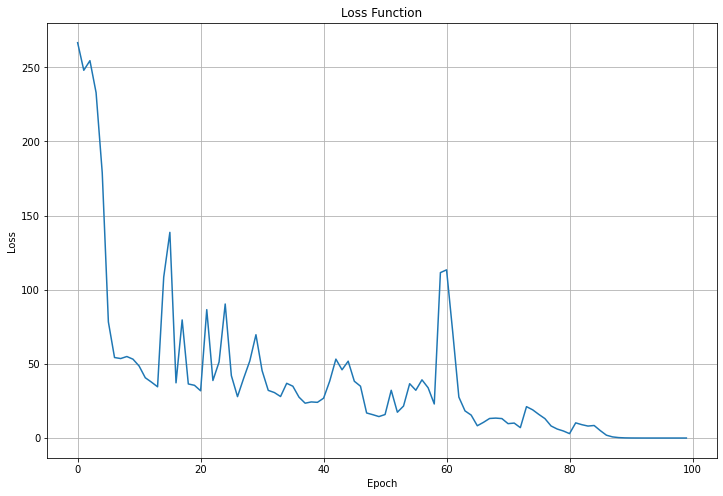

In [68]:
plt.figure(figsize=(12,8))
plt.plot([i['ner'] for i in loss])
plt.grid()
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [71]:
# Save our trained model
link_save_model = "/content/drive/My Drive/Colab Notebooks/coba/"
modelfile = input("Enter your Model Name: ")
model.to_disk(link_save_model + modelfile)

Enter your Model Name: model_NER


# Evaluation

In [80]:
from spacy import load, displacy

In [74]:
# import model
link_to_model = "/content/drive/My Drive/Colab Notebooks/coba/model_NER"
loaded_model = load(link_to_model)

In [78]:
# text source: 'https://www.antaranews.com/berita/1584798/erick-tetapkan-akhlak-sebagai-core-value-bumn'
test_text = """Jakarta (ANTARA) - Menteri Badan Usaha Milik Negara (BUMN) Erick Thohir menetapkan Amanah, Kompeten, Harmonis, Loyal, Adaptif, dan Kolaboratif ( AKHLAK)  sebagai "core value" di lingkungan kementerian. "Hari ini, juga saya ingin menetapkan AKHLAK sebagai 'core value', bukan 'lips service', karena kalau kita bekerja ada 'core value' ini yang membuat kita kuat," ujar Menteri Erick di sela sambutan peluncuran logo baru Kementerian BUMN di Kantor Kementerian BUMN, Jakarta, Rabu. Ia mengatakan AKHLAK menjadi nilai-nilai organisasi Kementerian BUMN untuk maju."""

In [81]:
doc = loaded_model(test_text)
displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Jakarta\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">hari</span>\n</mark>\n (ANTARA\n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    )\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">organisasi</span>\n</mark>\n - Menteri \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Badan Usaha Milik Negara (BUMN)\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.

In [88]:
test_text

'Jakarta (ANTARA) - Menteri Badan Usaha Milik Negara (BUMN) Erick Thohir menetapkan Amanah, Kompeten, Harmonis, Loyal, Adaptif, dan Kolaboratif ( AKHLAK)  sebagai "core value" di lingkungan kementerian. "Hari ini, juga saya ingin menetapkan AKHLAK sebagai \'core value\', bukan \'lips service\', karena kalau kita bekerja ada \'core value\' ini yang membuat kita kuat," ujar Menteri Erick di sela sambutan peluncuran logo baru Kementerian BUMN di Kantor Kementerian BUMN, Jakarta, Rabu. Ia mengatakan AKHLAK menjadi nilai-nilai organisasi Kementerian BUMN untuk maju.'

In [89]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Jakarta 0 7 hari
) 15 16 organisasi
Badan Usaha Milik Negara (BUMN) 27 58 organisasi
Erick Thohir 59 71 nama
Kompeten 91 99 organisasi
Harmonis 101 109 lokasi
Loyal 111 116 hari
Adaptif 118 125 lokasi
Kolaboratif 131 142 nama
" 173 174 organisasi
" 361 362 nama
Erick 376 381 nama
Kementerian BUMN 420 436 organisasi
Kantor Kementerian BUMN, Jakarta 440 472 lokasi
Rabu 474 478 hari
AKHLAK 494 500 organisasi
Kementerian BUMN 532 548 organisasi
